In [1]:
import pandas as pd
from time import time
import os
import json
import numpy as np 
from time import time

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="white")

In [2]:
start_time = time()
with open("configuration.json", 'rt') as infile:
    config = json.load(infile)

S = ['target', 'UN', 'UNHCR', 'worldbank', 'ACLED', 'UN', 'WHO']

sources = [os.path.join(config['paths']['output'], 
                        d['name'], 
                        'data.csv') for d in config['sources'] if (d['name'] in S)]


# Generate a data frame with all indicators
df = pd.concat((pd.read_csv(f) for f in sources), sort=False, ignore_index=True)

# Summary stats
print("Sources            : {}".format(len(sources)))
print("Shape              : {} (rows) {} (columns)".format(*df.shape))
print("Geographies        : {}".format(len(df['Country Name'].unique())))
print("Indicators         : {}".format(len(df['Indicator Code'].unique())))
print("Temporal coverage  : {} -> {}".format(df.year.min(), df.year.max()))
print("Null values        : {}".format(sum(df['value'].isnull())))

print("\nLoaded data in {:3.2f} sec.".format(time() - start_time))

Sources            : 6
Shape              : 252020 (rows) 6 (columns)
Geographies        : 315
Indicators         : 47
Temporal coverage  : 1950 -> 2018
Null values        : 0

Loaded data in 0.43 sec.


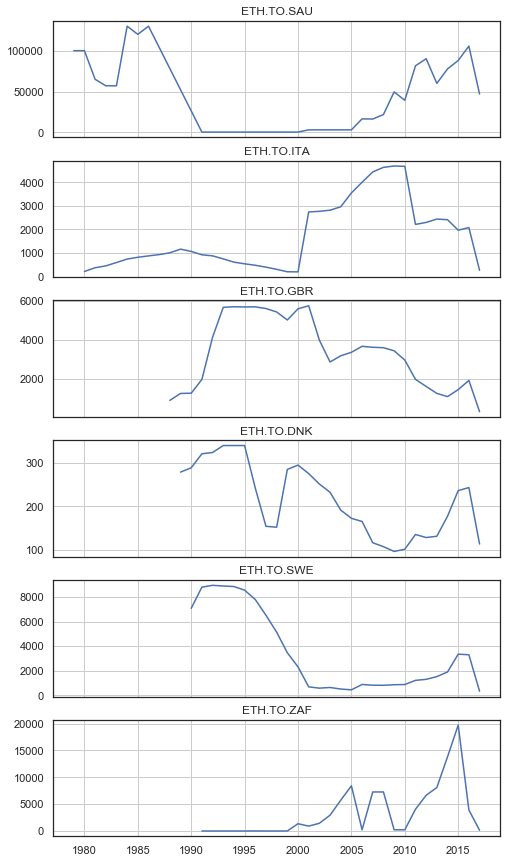

In [7]:
TARGETS = ['ETH.TO.SAU', 'ETH.TO.ITA', 
           'ETH.TO.GBR', 'ETH.TO.DNK',
           'ETH.TO.SWE', 'ETH.TO.ZAF']

fig, ax = plt.subplots(len(TARGETS), 1, 
                       figsize=(8, 15), 
                       sharex='col')

for i, t in enumerate(TARGETS):
    
    c1 = df['Country Code'] == 'ETH'
    c2 = df['Indicator Code'] == t
    
    tmp = df[c1 & c2].sort_values(by='year')
    
    ax[i].plot(tmp.year, tmp.value)
    ax[i].set_title(t)
    ax[i].grid(True)

plt.savefig("targets.png", dpi=200)

In [11]:
c1 = df['Country Code'] == 'ETH'
c2 = df['Indicator Code'] == 'ETH.TO.SAU'

df[c1 & c2].sort_values(by='year')

,year,Country Name,value,Country Code,Indicator Name,Indicator Code
0,1979,Ethiopia,100000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
4,1980,Ethiopia,100000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
11,1981,Ethiopia,65000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
18,1982,Ethiopia,57000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
25,1983,Ethiopia,57000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
33,1984,Ethiopia,130000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
42,1985,Ethiopia,120000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
51,1986,Ethiopia,130000.00000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
1817,1991,Ethiopia,303.40000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
1818,1992,Ethiopia,303.40000,ETH,Mixed migration to Saudi Arabia,ETH.TO.SAU
